## Regressão Linear

In [1]:
# IMPORTS #

import requests
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# validação
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

In [2]:
url="https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T2/dataset1.csv"
df=pd.read_csv(url)
all_predictors = [ f'V{x}' for x in range(1,14) ] # [V1,V2...V13]
target = 'target'

# TODO: Retirar comentarios
# plotar a correlação e calcular o coeficiente das features com o target ? Fiz primeira parte fazer o resto, como?
# ver correlação positiva e negativa entre as features. ok
# extrair função de cada método de regressão e fazer várias rodadas para plotar resultados
# ENDTODO


## Verificando correlações

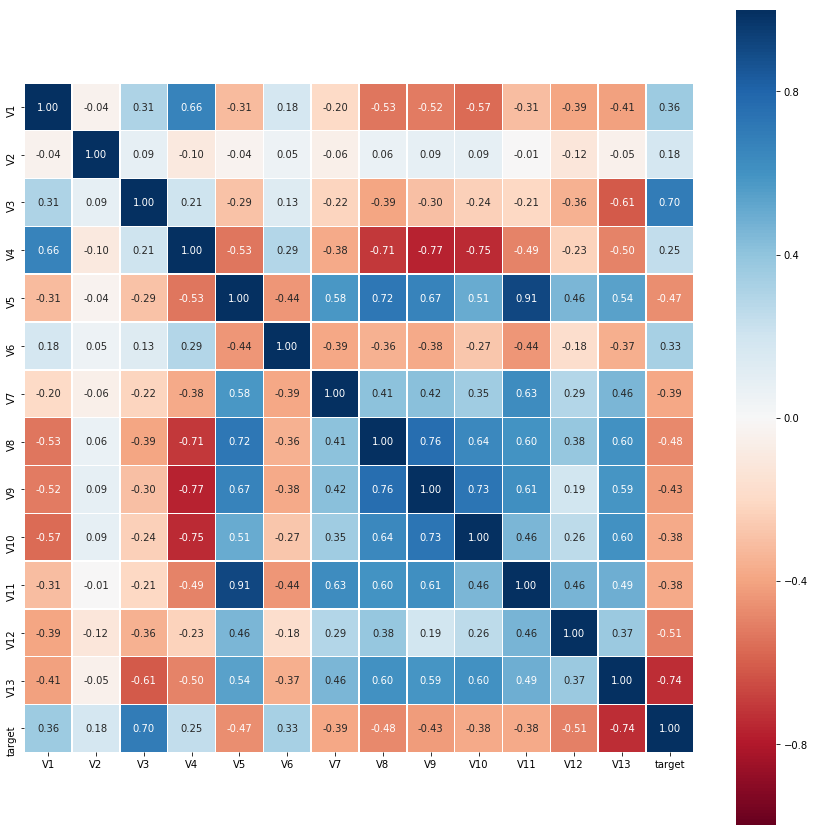

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.5,square = True,cmap = "RdBu",vmin=-1.0,vmax=1.0,annot = True,fmt =".2f",ax=ax)

In [4]:
# Verificando correlações fortes
from scipy.stats.stats import spearmanr  
labels = all_predictors + [target]
threshold = 0.7 
cor = df.corr() # matriz com a correlaçao de pearson
for col in cor:
    print(f"Corr de {col}:", end=" ")
    for i,val in enumerate(cor[col]):
        spearman_rho = spearmanr(df[col].values, df[labels[i]].values)[0] # calcula correlação de Spearman
        if (val**2 ) > threshold**2: # para pegar as corr negativas e positivas
            print(f"({labels[i]}: pear:{val:.2f},spear:{spearman_rho:.3f})", end=" ")
    print()

# Criando um dataset sem colunas com alta correlação
# Create correlation matrix
cor = df.corr().abs()

# Select upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("colunas a deletar ",to_drop)
df_no_corr = df.drop(df[to_drop], axis=1)

Corr de V1: (V1: pear:1.00,spear:1.000) 
Corr de V2: (V2: pear:1.00,spear:1.000) 
Corr de V3: (V3: pear:1.00,spear:1.000) 
Corr de V4: (V4: pear:1.00,spear:1.000) (V8: pear:-0.71,spear:-0.757) (V9: pear:-0.77,spear:-0.880) (V10: pear:-0.75,spear:-0.802) 
Corr de V5: (V5: pear:1.00,spear:1.000) (V8: pear:0.72,spear:0.664) (V11: pear:0.91,spear:0.705) 
Corr de V6: (V6: pear:1.00,spear:1.000) 
Corr de V7: (V7: pear:1.00,spear:1.000) 
Corr de V8: (V4: pear:-0.71,spear:-0.757) (V5: pear:0.72,spear:0.664) (V8: pear:1.00,spear:1.000) (V9: pear:0.76,spear:0.791) 
Corr de V9: (V4: pear:-0.77,spear:-0.880) (V8: pear:0.76,spear:0.791) (V9: pear:1.00,spear:1.000) (V10: pear:0.73,spear:0.795) 
Corr de V10: (V4: pear:-0.75,spear:-0.802) (V9: pear:0.73,spear:0.795) (V10: pear:1.00,spear:1.000) 
Corr de V11: (V5: pear:0.91,spear:0.705) (V11: pear:1.00,spear:1.000) 
Corr de V12: (V12: pear:1.00,spear:1.000) 
Corr de V13: (V13: pear:1.00,spear:1.000) (target: pear:-0.74,spear:-0.853) 
Corr de target: (V

In [5]:
dfTrain, dfTest = train_test_split(df_no_corr, test_size=0.1)

predictors =  all_predictors[:]
for ele in to_drop:
    predictors.remove(ele)

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain[target])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest[target])

alpha_list = [ 1 - x*0.002 for x in range( int(1/0.002) ) ]
alpha_list += [0.001]
#print(alpha_list)
 
best_variance = -100
best_mse = 1e30 # melhor mse
best_a = 200 # alpha que rendeu o melhor resultado
# variando o alpha
for a in alpha_list: 
    # Create linear regression object
    regr = sk.linear_model.Lasso(alpha=a,normalize=True)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    #print('Predictors:       ', predictors)

    # The coefficients
   # print('Coefficients:     ', regr.coef_)
    #print('Intercept:        ', regr.intercept_)

    # The mean squared error (MSE)
    #print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # Explained variance score: 1 is perfect prediction
    #print('Variance score:     %.2f' % r2_score(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    if( r2 > best_variance ):
        best_variance = r2
        best_mse = mse
        best_a = a
        best_regr = regr
print("best: a = {}, mse = {}, variancia = {}".format(best_a,best_mse,best_variance) )

best: a = 0.01200000000000001, mse = 14.908557170589695, variancia = 0.7648531346155996


### Usando lasso para avaliar as features
Fomos reduzindo o alpha para avaliar qual feature era usada pelo algoritmo

In [6]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors =  all_predictors

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain[target])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest[target])

alpha_list = [ 1 - x*0.002 for x in range( int(1/0.002) ) ]
alpha_list += [0.001]
#print(alpha_list)
 
best_variance = -100
best_mse = 1e30 # melhor mse
best_a = 200 # alpha que rendeu o melhor resultado
# variando o alpha
for a in alpha_list: 
    # Create linear regression object
    regr = sk.linear_model.Lasso(alpha=a,normalize=True)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    #print('Predictors:       ', predictors)

    # The coefficients
    #print('Coefficients:     ', regr.coef_)
    #print('Intercept:        ', regr.intercept_)

    # The mean squared error (MSE)
    #print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # Explained variance score: 1 is perfect prediction
    #print('Variance score:     %.2f' % r2_score(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    if( r2 > best_variance ):
        best_variance = r2
        best_mse = mse
        best_a = a
        best_regr = regr
print("best: a = {}, mse = {}, variancia = {}".format(best_a,best_mse,best_variance) )

best: a = 0.001, mse = 18.655434747264167, variancia = 0.8170944115688528


In [7]:
predictors = all_predictors

X = df[predictors]
y = df[target]
N_FOLDS = 4

scores = cross_val_score(best_regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(best_regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)

Cross-validated scores: [ 0.6073188   0.60738218  0.35116334 -1.06339091]


### Linear regression

In [8]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors =  all_predictors

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain[target])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest[target])

# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

print('Ajusted R^2')
SS_Residual = sum((y_test - y_pred)**2)
SS_Total = sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual)) / SS_Total
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

Predictors:        ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
Coefficients:      [ 4.34263113e-02  2.97063382e+00  3.69270496e+00 -1.56371375e+00
 -1.24900544e-02  9.79543866e-03 -1.06197135e-01  1.99535025e-02
 -1.91549333e+01  6.55367229e-03  3.17400217e-01 -9.09637541e-01
 -5.73118410e-01]
Intercept:         37.595399185497264
Mean squared error: 19.86
Variance score:     0.70
Ajusted R^2
0.7033377313109024 0.5991050423120303


In [9]:
predictors = all_predictors

X = df[predictors]
y = df[target]
N_FOLDS = 4

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)

Cross-validated scores: [ 0.60217169  0.60398145  0.35873597 -1.10867706]


### Ridge regression

In [10]:
dfTrain, dfTest = train_test_split(df, test_size=0.1)

predictors =  all_predictors

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain[target])

X_test = np.array(dfTest[predictors])
y_test = np.array(dfTest[target])

# Create linear regression object
regr = sk.linear_model.Ridge(normalize=True, alpha=0.003)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
Coefficients:      [ 4.48393120e-02  2.65000654e+00  3.65278117e+00 -1.43551317e+00
 -1.09339167e-02  9.54060189e-03 -1.07181714e-01  1.22156850e-02
 -1.82010296e+01  8.04753031e-03  2.92441281e-01 -1.01814724e+00
 -5.48581290e-01]
Intercept:         38.24238716026481
Mean squared error: 14.88
Variance score:     0.73


In [11]:
predictors = all_predictors

X = df[predictors]
y = df[target]
N_FOLDS = 4

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)

Cross-validated scores: [ 0.6065849   0.6055928   0.35900112 -1.07975972]
